### Setup

In [1]:
import sys
# check sys info
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from util_func import show_img
import random
import time

### Q1
Create a random noise color and grayscale image. You can set your own width and height, but keep the
total number of pixels of both images identical.

In [2]:
img = np.zeros((50, 50), np.uint8) # create a grayscale np array
img_clr = cv.cvtColor(img, cv.COLOR_GRAY2BGR) # convert to BGR

img_clr.shape

(50, 50, 3)

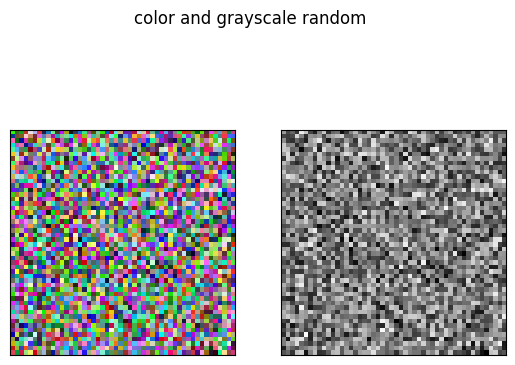

In [3]:
for i in range(50):
    for j in range (50):
        for k in range (3):
            img_clr[i, j ,k] = random.randint(0, 255) # randomize the pixel value of each layer
            
# convert back to grayscale            
img_gray = cv.cvtColor(img_clr, cv.COLOR_BGR2GRAY)

img_random = img_clr.copy()

# display both color and grayscale image together
plt.subplot(121)
plt.imshow(img_clr)
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(img_gray,cmap=plt.cm.gray)
plt.xticks([]), plt.yticks([])
plt.suptitle("color and grayscale random")
plt.show()

### Q2

Convert the code chunk found under section Divide an image into smaller patches using cropping into a
function with the following signature:
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)

In [4]:
# img is the source image
# num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
# line_color is the color of the grid line.
# The output of the function should be image with grids

In [5]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color): # color in BGR
    img_copy = img.copy()
    h, w = img.shape[:2]
    
    # get number of pixel of each column and row
    m = int(h / num_vertical_grid) # num of pixel per grid in veritical
    n = int(w / num_horizontal_grid) # num of pixel per grid in horizontal
    
    tiles = []
    for y in range(0, h, m): # from pixel 0 to h, each time jump m pixel
        for x in range(0, w, n): # from pixel 0 to w, each time jump n pixel
            
            # second point of the rectangle (x1, y1)
            x1 = x + n 
            y1 = y + m

            # if both x1 and y1 fall outside the range of the image
            if x1 > w and y1 > h:
                x1 = w - 1
                y1 = h - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                
            
            # if only y1 falls outside the image
            elif y1 > h:
                y1 = h - 1 # limit y1 at the last pixel of the y-axis
                cv.rectangle(img_copy, (x, y), (x1,y1), line_color, 1)
                
            
            # if x1 falls outside the image
            elif x1 > w:
                x1 = w - 1 # limit x1 at the last pixel of the x-axis
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                
            # if both x1 and y1 within image
            else:
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                
    
    show_img("cropped image", img_copy)

In [6]:
img = cv.imread("images/dog.jfif")

tiles = crop_grid(img, 3, 3, (255, 255, 0))

In [7]:
# to shuffle the cropped image

# random.shuffle(tiles)
# 
# img_list = []
# a = 0
# for i in range (3):
#     h_img = []
#     for j in range (3):
#         h_img.append(tiles[a])
#         a += 1
#         
#     image_h = cv.hconcat(h_img)
#     img_list.append(image_h)
# 
# img = cv.vconcat(img_list)   
# show_img("try", img)

### Q3
Display image sequences of smooth transition of two images with different values of $$\alpha$$. Refer to code in
section "Image blending". Use "lena.jfif" and "coins.jfif" as the base images.


In [8]:
img1 = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

# reshape of image to make it same dimension
new_shape = img1.shape[:2]
img2 = cv.resize(img2, new_shape[::-1])


# blending images with different alpha value
for i in range(0, 100):
    a = i / 100 # alpha value between  0 and 1
    dst = cv.addWeighted(img1, a, img2, 1-a, 0)
    cv.imshow("blending", dst)
    cv.waitKey(20) # transition each 20ms

cv.waitKey(0)
cv.destroyAllWindows()

### Q4
Suppose you are a digital content creator and wish to share photo online. However, you wish to protect these images from being stolen or altered by others. Leverage your image processing knowledge to apply watermark on image "travel_hd.jpg". The example of resulting watermarked image are as shown in the following:

In [9]:
def add_watermark(img, watermark, display_ratio):
    
    # resize the image base on the display_ratio
    img_res = cv.resize(img, None, fx = display_ratio, fy = display_ratio)
    
    # determine the size of the watermark (0.1 to the size of the image)
    wm_res_y = int(img_res.shape[0] * 0.15)
    wm_ratio = wm_res_y / watermark.shape[0] 
    wm_res_x = int(watermark.shape[1] * wm_ratio)
    
    # resize using calculated y and x
    wm_res = cv.resize(watermark, (wm_res_x, wm_res_y))
    
    # watermark exist at the bottom left corner
    h, w, = img_res.shape[:2] # image height and weight
    wm_h, wm_w = wm_res.shape[:2] # watermark height and weight
    
    # determine the watermark region (bottom left corner)
    wm_region = img_res[h-wm_h:h, :wm_w]
    
    # add watermark to the region
    blend = cv.addWeighted(wm_region, 0.75, wm_res, 0.25, 0)
    img_res[h-wm_h:h, :wm_w] = blend # replace with blended image
    
    show_img("Watermarked Image", img_res)
    cv.imwrite("watermarked img.jpg", img_res)

In [10]:
img = cv.imread("images/travel_hd.jpg")
watermark = cv.imread("images/watermark.png")

add_watermark(img, watermark, 0.20)